<a href="https://colab.research.google.com/github/jessifebria/Clustering-Regression-and-Prediction-COVID19-Indonesian-dataset/blob/main/COVID19_Clustering%2C_Regression%2C_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from pandas.plotting import table 
import numpy as np

%matplotlib inline

data = pd.read_csv('/content/drive/My Drive/datacovid.csv')

data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,489,20,39,430,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,45.09,0.0,1.84,4.09%,7.98%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,491,20,39,432,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,45.27,0.0,1.84,4.07%,7.94%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-JB,Jawa Barat,3,0,0,3,12,5,4,3,Province,NaN,Jawa Barat,Indonesia,Asia,Jawa,UTC+07:00,NaN,18,9.0,627,645.0,5312.0,35378,45161325,1276.55,107.603708,-6.920432,0.07,0.27,0.0,0.11,41.67%,33.33%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,493,20,39,434,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,45.45,0.0,1.84,4.06%,7.91%,1.0,1.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


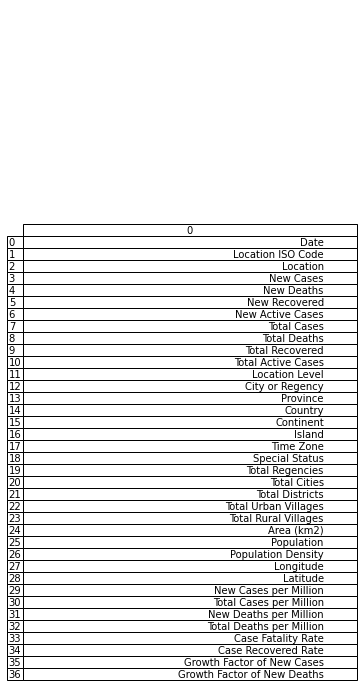

In [ ]:

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, pd.DataFrame(data.columns))

In [ ]:
array_province = list(data["Province"].unique())
print ("Jumlah Provinsi = ", len(array_province))
print (pd.DataFrame(array_province))

Jumlah Provinsi =  35
                             0
0                  DKI Jakarta
1                          NaN
2                   Jawa Barat
3                       Banten
4            Sulawesi Tenggara
5             Kalimantan Timur
6   Daerah Istimewa Yogyakarta
7               Sumatera Utara
8                  Jawa Tengah
9                   Jawa Timur
10            Sulawesi Selatan
11                      Maluku
12                       Papua
13                Maluku Utara
14                        Aceh
15           Kalimantan Tengah
16                     Lampung
17             Sulawesi Tengah
18              Sumatera Barat
19                 Papua Barat
20            Kalimantan Utara
21              Sulawesi Barat
22            Sumatera Selatan
23                        Bali
24            Kalimantan Barat
25                        Riau
26                       Jambi
27          Kalimantan Selatan
28   Kepulauan Bangka Belitung
29              Kepulauan Riau
30               

In [ ]:
data.loc[data["Province"].isna()]

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00%,0.00%,NaN,NaN
5,3/3/2020,IDN,Indonesia,0,0,0,0,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.00,0.01,0.00,0.00,0.00%,0.00%,0.00,1.00
8,3/4/2020,IDN,Indonesia,0,0,0,0,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.00,0.01,0.00,0.00,0.00%,0.00%,1.00,1.00
11,3/5/2020,IDN,Indonesia,0,0,0,0,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.00,0.01,0.00,0.00,0.00%,0.00%,1.00,1.00
15,3/6/2020,IDN,Indonesia,2,0,0,2,4,0,0,4,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.02,0.00,0.00,0.00%,0.00%,NaN,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7629,10/27/2020,IDN,Indonesia,3520,101,4576,-1157,396454,13512,322248,60694,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,13.27,1495.01,0.38,50.95,3.41%,81.28%,1.09,0.90
7664,10/28/2020,IDN,Indonesia,4029,100,3545,384,400483,13612,325793,61078,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,15.19,1510.20,0.38,51.33,3.40%,81.35%,1.14,0.99
7699,10/29/2020,IDN,Indonesia,3565,89,3985,-509,404048,13701,329778,60569,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,13.44,1523.64,0.34,51.67,3.39%,81.62%,0.88,0.89
7734,10/30/2020,IDN,Indonesia,2897,81,4517,-1701,406945,13782,334295,58868,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,10.92,1534.57,0.31,51.97,3.39%,82.15%,0.81,0.91


In [ ]:
array_province.pop(1)
print (pd.DataFrame(array_province))

                             0
0                  DKI Jakarta
1                   Jawa Barat
2                       Banten
3            Sulawesi Tenggara
4             Kalimantan Timur
5   Daerah Istimewa Yogyakarta
6               Sumatera Utara
7                  Jawa Tengah
8                   Jawa Timur
9             Sulawesi Selatan
10                      Maluku
11                       Papua
12                Maluku Utara
13                        Aceh
14           Kalimantan Tengah
15                     Lampung
16             Sulawesi Tengah
17              Sumatera Barat
18                 Papua Barat
19            Kalimantan Utara
20              Sulawesi Barat
21            Sumatera Selatan
22                        Bali
23            Kalimantan Barat
24                        Riau
25                       Jambi
26          Kalimantan Selatan
27   Kepulauan Bangka Belitung
28              Kepulauan Riau
29                    Bengkulu
30         Nusa Tenggara Barat
31      

In [ ]:
data_clustering = pd.DataFrame(columns = ["Province", "Total Cases", "Total Deaths", "Total Recovered", "Population Density"])

i=0
for province in array_province:
  data_clustering.loc[i]= [array_province[i],  data.loc[data["Province"]==province]["Total Cases"].iloc[-1], data.loc[data["Province"]==province]["Total Deaths"].iloc[-1], 
                           data.loc[data["Province"]==province]["Total Recovered"].iloc[-1],data.loc[data["Province"]==province]["Population Density"].iloc[-1]]
  i+=1
  
data_clustering.head(34)

,Province,Total Cases,Total Deaths,Total Recovered,Population Density
0,DKI Jakarta,105597,2251,93251,16334.31
1,Jawa Barat,36338,719,25644,1276.55
2,Banten,9490,269,7422,1109.64
3,Sulawesi Tenggara,4950,82,3863,69.23
4,Kalimantan Timur,14091,482,11066,27.52
5,Daerah Istimewa Yogyakarta,3835,93,3147,1158.90
6,Sumatera Utara,13107,534,10706,203.82
7,Jawa Tengah,33912,1745,28094,1108.64
8,Jawa Timur,52465,3768,46378,846.78
9,Sulawesi Selatan,18345,467,16444,201.78


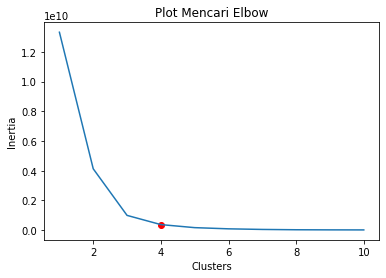

Hasil K-Means dengan 4 Clusters


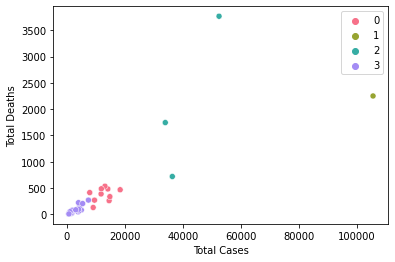

In [ ]:


inersia=[]

cluster_cases_deaths = data_clustering[["Total Cases", "Total Deaths"]]

for i in range(1,11):
  cluster=KMeans(n_clusters=i).fit(cluster_cases_deaths)
  inersia.append(cluster.inertia_)

plt.plot(4,inersia[3],'ro') 
plt.plot(list(range(1,11)),inersia)
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.title("Plot Mencari Elbow")
plt.show()

hasil=KMeans(n_clusters=4).fit(cluster_cases_deaths)
print("Hasil K-Means dengan",4, "Clusters")
sns.scatterplot(x=cluster_cases_deaths['Total Cases'],y=cluster_cases_deaths["Total Deaths"], hue=hasil.labels_ , palette=sns.color_palette('husl',4))

plt.show()


In [ ]:

labels = hasil.labels_
cluster0 =[]
cluster1 =[]
cluster2 =[]
cluster3 =[]
i=0

for label in labels:
  if label==0:
    cluster0.append(data_clustering.loc[i]["Province"])
  elif label==1:
    cluster1.append(data_clustering.loc[i]["Province"])
  elif label==2:
    cluster2.append(data_clustering.loc[i]["Province"])
  else:
    cluster3.append(data_clustering.loc[i]["Province"])
  i+=1

print("Hasil Clustering dari Total Cases vs Total Deaths")
print()
print("Provinsi Cluster 0 :", cluster0)
print("Provinsi Cluster 1 :",cluster1)
print("Provinsi Cluster 2 :",cluster2)
print("Provinsi Cluster 3 :",cluster3)

Hasil Clustering dari Total Cases vs Total Deaths

Provinsi Cluster 0 : ['Banten', 'Kalimantan Timur', 'Sumatera Utara', 'Sulawesi Selatan', 'Papua', 'Sumatera Barat', 'Sumatera Selatan', 'Bali', 'Riau', 'Kalimantan Selatan']
Provinsi Cluster 1 : ['DKI Jakarta']
Provinsi Cluster 2 : ['Jawa Barat', 'Jawa Tengah', 'Jawa Timur']
Provinsi Cluster 3 : ['Sulawesi Tenggara', 'Daerah Istimewa Yogyakarta', 'Maluku', 'Maluku Utara', 'Aceh', 'Kalimantan Tengah', 'Lampung', 'Sulawesi Tengah', 'Papua Barat', 'Kalimantan Utara', 'Sulawesi Barat', 'Kalimantan Barat', 'Jambi', 'Kepulauan Bangka Belitung', 'Kepulauan Riau', 'Bengkulu', 'Nusa Tenggara Barat', 'Sulawesi Utara', 'Nusa Tenggara Timur', 'Gorontalo']


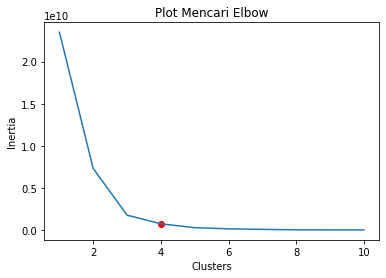

Hasil K-Means dengan 4 Clusters


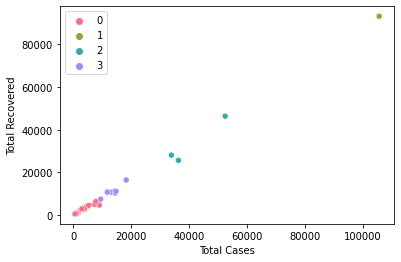

In [ ]:


inersia=[]

cluster_cases_recovered = data_clustering[["Total Cases", "Total Recovered"]]

for i in range(1,11):
  cluster=KMeans(n_clusters=i).fit(cluster_cases_recovered)
  inersia.append(cluster.inertia_)

plt.plot(4,inersia[3],'ro') 
plt.plot(list(range(1,11)),inersia)
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.title("Plot Mencari Elbow")
plt.show()

hasil=KMeans(n_clusters=4).fit(cluster_cases_recovered)
print("Hasil K-Means dengan",4, "Clusters")
sns.scatterplot(x=cluster_cases_recovered['Total Cases'],y=cluster_cases_recovered["Total Recovered"], hue=hasil.labels_ , palette=sns.color_palette('husl',4))

plt.show()

In [ ]:
data_clustering[data_clustering["Total Cases"]>100000]

,Province,Total Cases,Total Deaths,Total Recovered,Population Density
0,DKI Jakarta,105597,2251,93251,16334.31


In [ ]:
data_clustering[data_clustering["Total Cases"]>20000]

,Province,Total Cases,Total Deaths,Total Recovered,Population Density
0,DKI Jakarta,105597,2251,93251,16334.31
1,Jawa Barat,36338,719,25644,1276.55
7,Jawa Tengah,33912,1745,28094,1108.64
8,Jawa Timur,52465,3768,46378,846.78


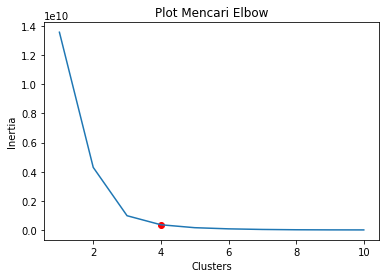

Hasil K-Means dengan 4 Clusters


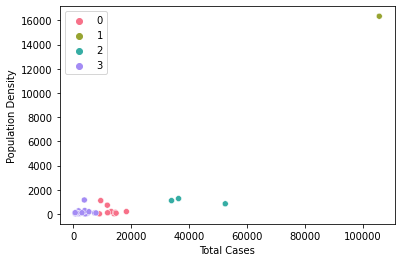

In [ ]:
inersia=[]

cluster_cases_population = data_clustering[["Total Cases", "Population Density"]]

for i in range(1,11):
  cluster=KMeans(n_clusters=i).fit(cluster_cases_population)
  inersia.append(cluster.inertia_)

plt.plot(4,inersia[3],'ro') 
plt.plot(list(range(1,11)),inersia)
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.title("Plot Mencari Elbow")
plt.show()

hasil=KMeans(n_clusters=4).fit(cluster_cases_population)
print("Hasil K-Means dengan",4, "Clusters")
sns.scatterplot(x=cluster_cases_population['Total Cases'],y=cluster_cases_population["Population Density"], hue=hasil.labels_ , palette=sns.color_palette('husl',4))

plt.show()

In [ ]:

labels = hasil.labels_
cluster0 =[]
cluster1 =[]
cluster2 =[]
cluster3 =[]
i=0

for label in labels:
  if label==0:
    cluster0.append(data_clustering.loc[i]["Province"])
  elif label==1:
    cluster1.append(data_clustering.loc[i]["Province"])
  elif label==2:
    cluster2.append(data_clustering.loc[i]["Province"])
  else:
    cluster3.append(data_clustering.loc[i]["Province"])
  i+=1

print("Hasil Clustering dari Total Cases vs Population Density")
print()
print("Provinsi Cluster 0 :", cluster0)
print("Provinsi Cluster 1 :",cluster1)
print("Provinsi Cluster 2 :",cluster2)
print("Provinsi Cluster 3 :",cluster3)

Hasil Clustering dari Total Cases vs Population Density

Provinsi Cluster 0 : ['Banten', 'Kalimantan Timur', 'Sumatera Utara', 'Sulawesi Selatan', 'Papua', 'Sumatera Barat', 'Bali', 'Riau', 'Kalimantan Selatan']
Provinsi Cluster 1 : ['DKI Jakarta']
Provinsi Cluster 2 : ['Jawa Barat', 'Jawa Tengah', 'Jawa Timur']
Provinsi Cluster 3 : ['Sulawesi Tenggara', 'Daerah Istimewa Yogyakarta', 'Maluku', 'Maluku Utara', 'Aceh', 'Kalimantan Tengah', 'Lampung', 'Sulawesi Tengah', 'Papua Barat', 'Kalimantan Utara', 'Sulawesi Barat', 'Sumatera Selatan', 'Kalimantan Barat', 'Jambi', 'Kepulauan Bangka Belitung', 'Kepulauan Riau', 'Bengkulu', 'Nusa Tenggara Barat', 'Sulawesi Utara', 'Nusa Tenggara Timur', 'Gorontalo']


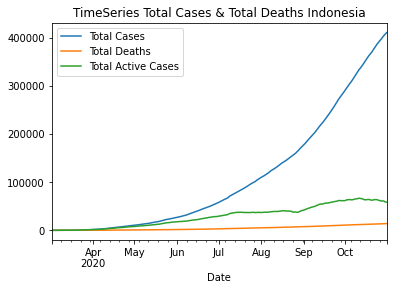

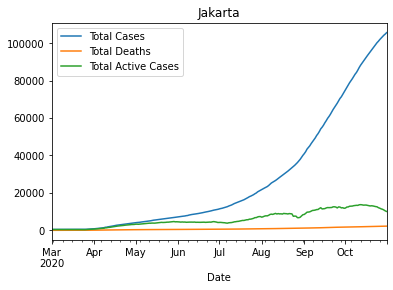

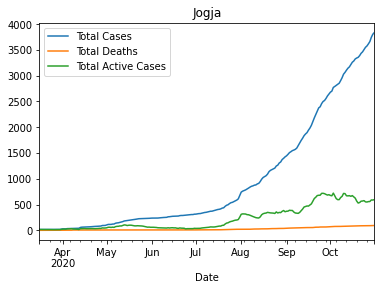

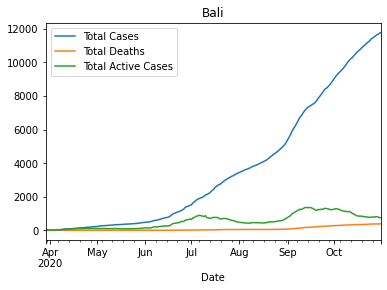

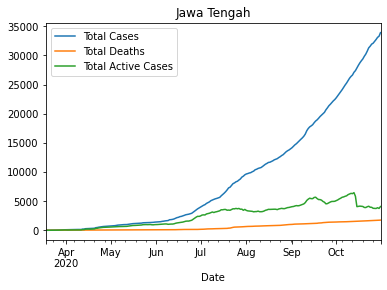

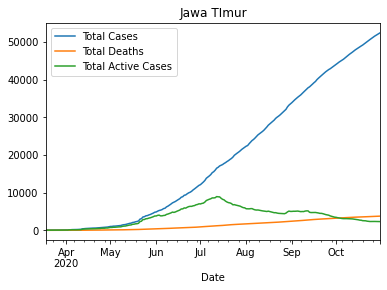

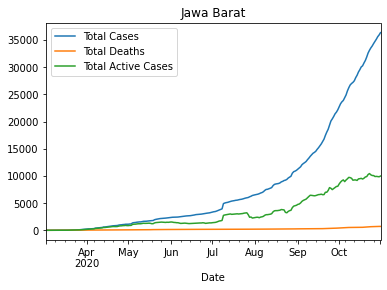

In [ ]:

data_idn = data.loc[data["Location ISO Code"]=="IDN"][["Date","Total Cases","Total Deaths","Total Active Cases"]].squeeze()
data_idn["Date"]= pd.to_datetime(data_idn['Date'], infer_datetime_format=True) 
data_idn.plot(x="Date")
plt.title("TimeSeries Total Cases & Total Deaths Indonesia")
plt.show()

#JAKARTA
data_idn = data.loc[data["Location ISO Code"]=='ID-JK'][["Date","Total Cases","Total Deaths","Total Active Cases"]].squeeze()
data_idn["Date"]= pd.to_datetime(data_idn['Date'], infer_datetime_format=True) 
data_idn.plot(x="Date")
plt.title("Jakarta")
plt.show()
#JOGJA
data_idn = data.loc[data["Location ISO Code"]=='ID-YO'][["Date","Total Cases","Total Deaths","Total Active Cases"]].squeeze()
data_idn["Date"]= pd.to_datetime(data_idn['Date'], infer_datetime_format=True) 
data_idn.plot(x="Date")
plt.title("Jogja")
plt.show()
#BALI
data_idn = data.loc[data["Location ISO Code"]=='ID-BA'][["Date","Total Cases","Total Deaths","Total Active Cases"]].squeeze()
data_idn["Date"]= pd.to_datetime(data_idn['Date'], infer_datetime_format=True) 
data_idn.plot(x="Date")
plt.title("Bali")
plt.show()
#JATENG
data_idn = data.loc[data["Location ISO Code"]=='ID-JT'][["Date","Total Cases","Total Deaths","Total Active Cases"]].squeeze()
data_idn["Date"]= pd.to_datetime(data_idn['Date'], infer_datetime_format=True) 
data_idn.plot(x="Date")
plt.title("Jawa Tengah")
plt.show()
#JATIM
data_idn = data.loc[data["Location ISO Code"]=='ID-JI'][["Date","Total Cases","Total Deaths","Total Active Cases"]].squeeze()
data_idn["Date"]= pd.to_datetime(data_idn['Date'], infer_datetime_format=True) 
data_idn.plot(x="Date")
plt.title("Jawa TImur")
plt.show()
#JABAR
data_idn = data.loc[data["Location ISO Code"]=='ID-JB'][["Date","Total Cases","Total Deaths","Total Active Cases"]].squeeze()
data_idn["Date"]= pd.to_datetime(data_idn['Date'], infer_datetime_format=True) 
data_idn.plot(x="Date")
plt.title("Jawa Barat")
plt.show()

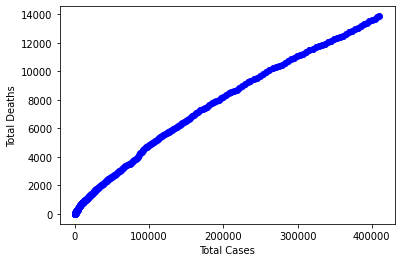

Koefisien:  [[0.03496315]]
Intersep:  [605.07497984]
Mean absolute error: 489.62
R2-score: 0.98


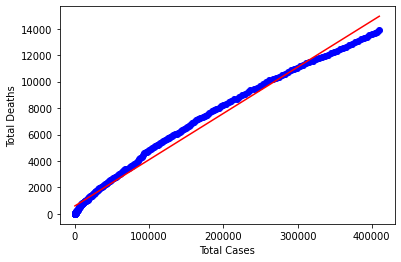

In [ ]:
data_regresi_idn = data.loc[data["Location ISO Code"]=="IDN"][["Total Cases","Total Deaths"]]

plt.scatter(data_regresi_idn["Total Cases"],data_regresi_idn["Total Deaths"],  color='blue')
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.show()

msk = np.random.rand(len(data_regresi_idn)) < 0.8
train = data_regresi_idn[msk]
test = data_regresi_idn[~msk]

from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train["Total Cases"]).reshape(-1, 1)
train_y = np.asanyarray(train["Total Deaths"]).reshape(-1, 1)
regr.fit(train_x, train_y)
# The coefficients
print ('Koefisien: ', regr.coef_)
print ('Intersep: ',regr.intercept_)


plt.scatter(data_regresi_idn["Total Cases"],data_regresi_idn["Total Deaths"],  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")


from sklearn.metrics import r2_score

test_x = np.asanyarray(test["Total Cases"]).reshape(-1, 1)
test_y = np.asanyarray(test["Total Deaths"]).reshape(-1, 1)
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

In [ ]:
import math

total_cases_now = np.array([479000]).reshape(1,-1)
print("Total Kasus Sekarang : 479000")
print("Prediksi Jumlah Kematian berdasarkan model Linear Regresi : ", math.ceil(regr.predict(total_cases_now)[0][0]))

Total Kasus Sekarang : 479000
Prediksi Jumlah Kematian berdasarkan model Linear Regresi :  17353
